# Forest_Fire

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the given Data
df=pd.read_csv('forestfires.csv')
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

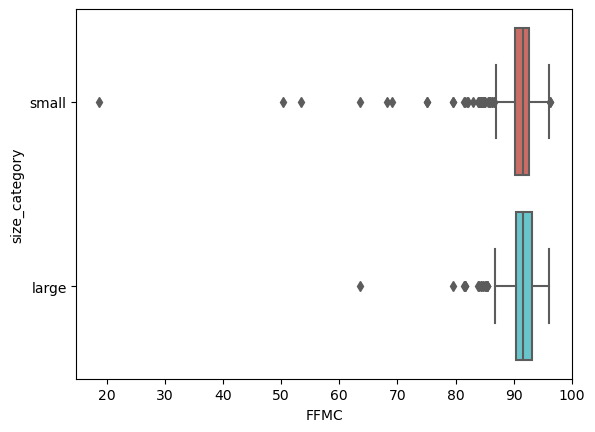

In [4]:
sns.boxplot(x="FFMC",y="size_category",data=df,palette = "hls")
plt.show()

In [5]:
df_co=df.copy()
df_copy=df_co.iloc[:,0:7]

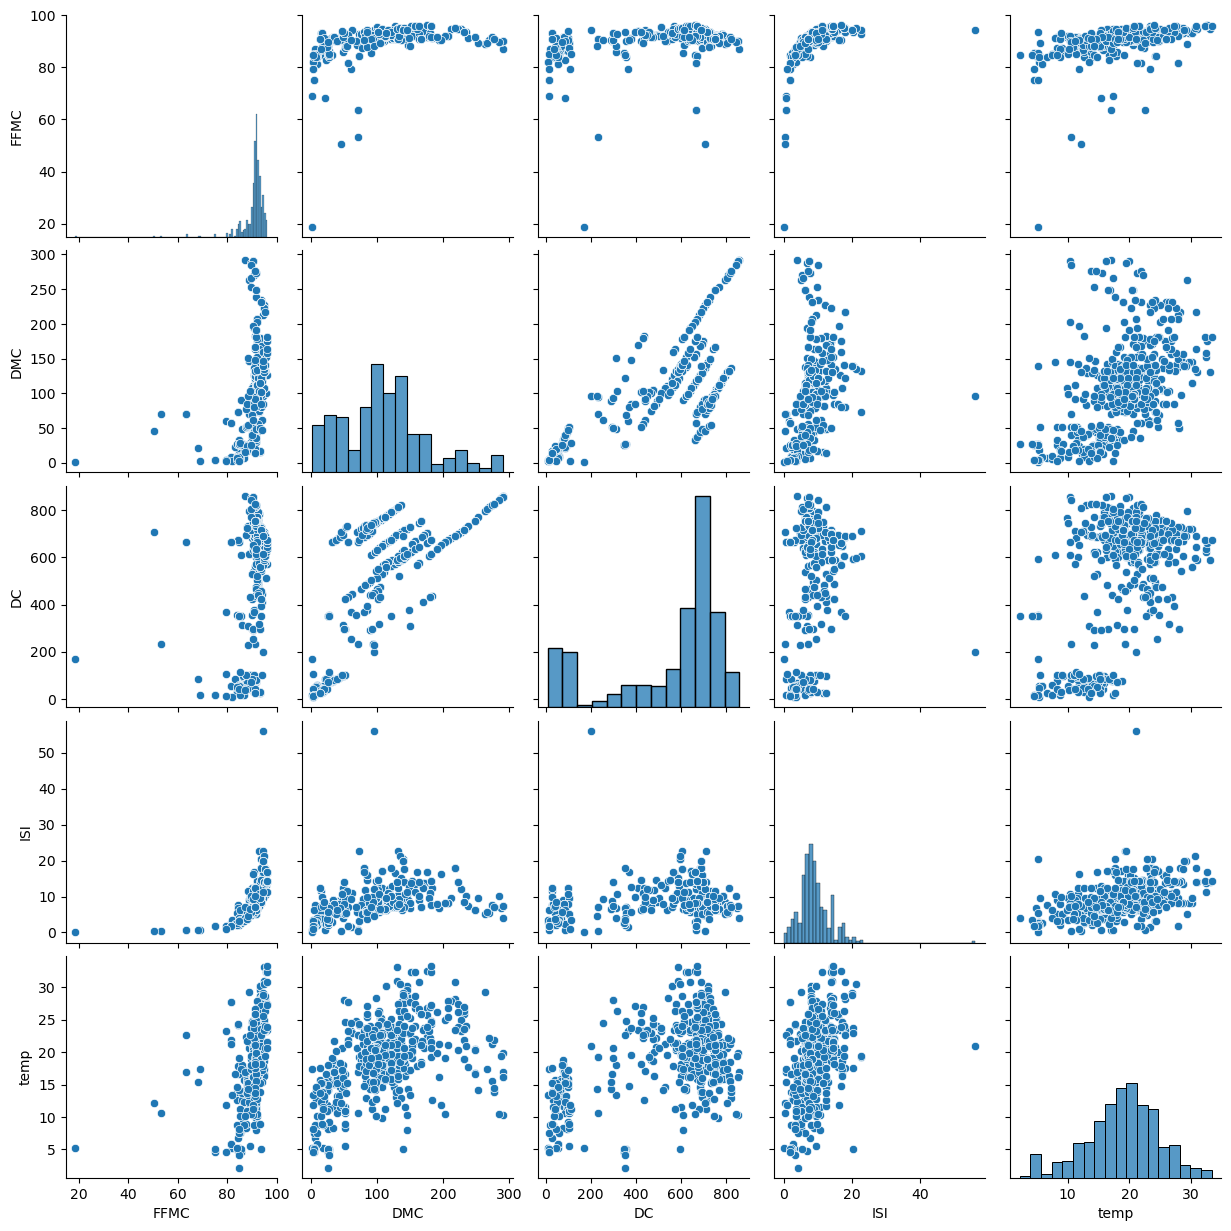

In [6]:
sns.pairplot(data=df_copy)
plt.show()

In [7]:
df.drop(['month','day'],axis=1,inplace=True)
df.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 29 columns]

In [8]:
# Split the Data to train and test
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthdec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
# Built the SVM model
model = SVC()
param_grid = [{'kernel':['linear','rbf','polynomial'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
model1= RandomizedSearchCV(model,param_grid,cv=6,)
model1.fit(X_train,Y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.01],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf',
                                                    'polynomial']}])

In [11]:
model1.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.01}

In [12]:
model1.best_score_

0.9861566484517303

In [13]:
# Built the Final SVM model
final_model=SVC(kernel='linear',gamma=0.5,C=10)
final_model.fit(X_train,Y_train)

SVC(C=10, gamma=0.5, kernel='linear')

In [14]:
y_hat=final_model.predict(X_train)
ac=accuracy_score(Y_train,y_hat)*100
print("accuracy_train=",ac)

accuracy_train= 100.0


In [15]:
y_pred=final_model.predict(X_test)
acc=accuracy_score(Y_test,y_pred)*100
print("accuracy_test =",acc)

accuracy_test = 98.71794871794873


In [16]:
# Confusion_Matrix and classification_report for Training Data
cm=confusion_matrix(Y_train,y_hat)
cm

array([[ 98,   0],
       [  0, 263]], dtype=int64)

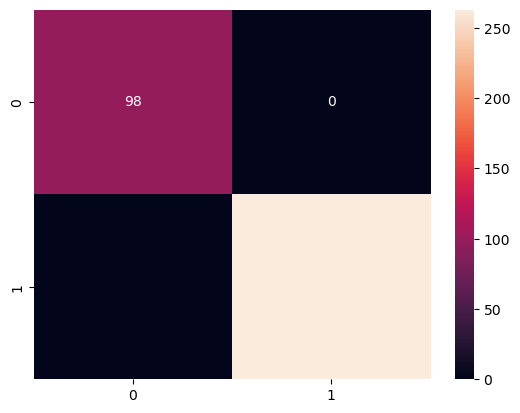

In [17]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [18]:
print(classification_report(Y_train,y_hat))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00        98
       small       1.00      1.00      1.00       263

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



In [19]:
# Confusion_Matrix for Testing Data
cm1=confusion_matrix(Y_test,y_pred)
cm1

array([[ 39,   2],
       [  0, 115]], dtype=int64)

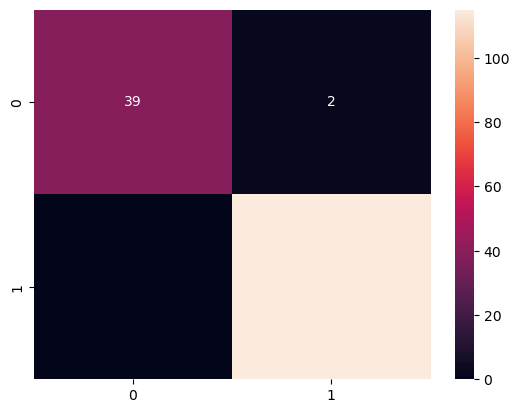

In [20]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.show()

In [21]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      0.95      0.97        41
       small       0.98      1.00      0.99       115

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



# Salary_Data

In [22]:
## Read the given data
train = pd.read_csv('SalaryData_Train(1).csv')
test = pd.read_csv('SalaryData_Test(1).csv')

In [23]:
#copying the data
df1 = train.copy()
df2 = test.copy()

In [24]:
df1.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [26]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

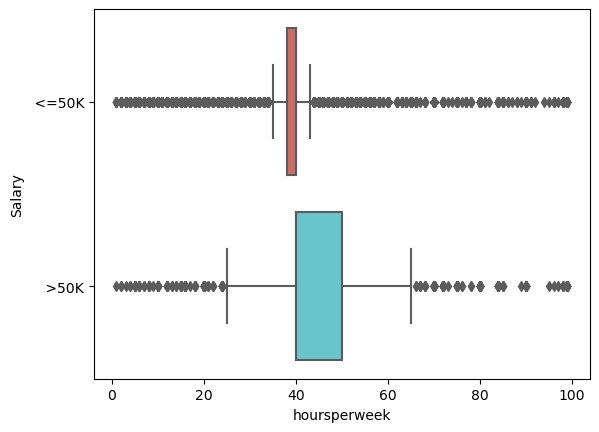

In [27]:
sns.boxplot(x="hoursperweek",y="Salary",data=df1,palette = "hls")
plt.show()

In [28]:
df2.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [30]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

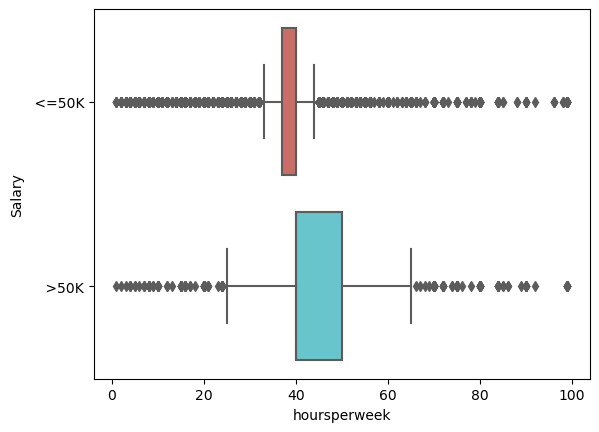

In [31]:
sns.boxplot(x="hoursperweek",y="Salary",data=df2,palette = "hls")
plt.show()

In [32]:
train1=df1.iloc[:,0:13]
train1=pd.get_dummies(train1)
train1.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   39           13         2174            0            40   
1   50           13            0            0            13   
2   38            9            0            0            40   
3   53            7            0            0            40   
4   28           13            0            0            40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                         True  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0             False                False             False          False   
1             False                False             False          False   
2             False                False             False          False   
3             False                False             False          False   
4             False                False             False          False   

   native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0           False             False                    False   
1           False             False                    False   
2           False             False                    False   
3           False             False                    False   
4           False             False                    False   

   native_ United-States  native_ Vietnam  native_ Yugoslavia  
0                   True            False               False  
1                   True            False               False  
2                   True            False               False  
3                   True            False               False  
4                  False            False               False  

[5 rows x 102 columns]

In [33]:
test1=df2.iloc[:,0:13]
test1=pd.get_dummies(test1)
test1.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   25            7            0            0            40   
1   38            9            0            0            50   
2   28           12            0            0            40   
3   44           10         7688            0            40   
4   34            6            0            0            30   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False                True   
1                   False                 False                True   
2                   False                  True               False   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                        False  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0             False                False             False          False   
1             False                False             False          False   
2             False                False             False          False   
3             False                False             False          False   
4             False                False             False          False   

   native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0           False             False                    False   
1           False             False                    False   
2           False             False                    False   
3           False             False                    False   
4           False             False                    False   

   native_ United-States  native_ Vietnam  native_ Yugoslavia  
0                   True            False               False  
1                   True            False               False  
2                   True            False               False  
3                   True            False               False  
4                   True            False               False  

[5 rows x 102 columns]

In [34]:
finaltrain = pd.concat([train1, df1['Salary']],axis=1)
finaltrain.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   39           13         2174            0            40   
1   50           13            0            0            13   
2   38            9            0            0            40   
3   53            7            0            0            40   
4   28           13            0            0            40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                         True  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                False             False          False           False   
1                False             False          False           False   
2                False             False          False           False   
3                False             False          False           False   
4                False             False          False           False   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0             False                    False                   True   
1             False                    False                   True   
2             False                    False                   True   
3             False                    False                   True   
4             False                    False                  False   

   native_ Vietnam  native_ Yugoslavia  Salary  
0            False               False   <=50K  
1            False               False   <=50K  
2            False               False   <=50K  
3            False               False   <=50K  
4            False               False   <=50K  

[5 rows x 103 columns]

In [35]:
finaltest = pd.concat([test1, df2['Salary']],axis=1)
finaltest.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   25            7            0            0            40   
1   38            9            0            0            50   
2   28           12            0            0            40   
3   44           10         7688            0            40   
4   34            6            0            0            30   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False                True   
1                   False                 False                True   
2                   False                  True               False   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                        False  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                False             False          False           False   
1                False             False          False           False   
2                False             False          False           False   
3                False             False          False           False   
4                False             False          False           False   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0             False                    False                   True   
1             False                    False                   True   
2             False                    False                   True   
3             False                    False                   True   
4             False                    False                   True   

   native_ Vietnam  native_ Yugoslavia  Salary  
0            False               False   <=50K  
1            False               False   <=50K  
2            False               False    >50K  
3            False               False    >50K  
4            False               False   <=50K  

[5 rows x 103 columns]

In [36]:
# Finaltrain data
X = finaltrain.values[:,0:5]
Y = finaltrain.values[:,102]
X

array([[39, 13, 2174, 0, 40],
       [50, 13, 0, 0, 13],
       [38, 9, 0, 0, 40],
       ...,
       [58, 9, 0, 0, 40],
       [22, 9, 0, 0, 20],
       [52, 9, 15024, 0, 40]], dtype=object)

In [37]:
#Finaltest data
x = finaltest.values[:,0:5]
y = finaltest.values[:,102]

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((21112, 5), (9049, 5), (21112,), (9049,))

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [42]:
model = SVC(kernel='rbf',C=0.5,gamma=0.1, random_state=42)
model.fit(X_train_scaled, Y_train)

SVC(C=0.5, gamma=0.1, random_state=42)

In [43]:
y_hat=model.predict(X_train_scaled)
ac=accuracy_score(Y_train,y_hat)*100
print("accuracy_train=",ac)

accuracy_train= 81.96760136415308


In [44]:
y_pred=model.predict(X_test_scaled)
acc=accuracy_score(Y_test,y_pred)*100
print("accuracy_test =",acc)

accuracy_test = 81.41231075256935


In [45]:
# Confusion_Matrix and classification_report for Training Data
cm=confusion_matrix(Y_train,y_hat)
cm

array([[15394,   479],
       [ 3328,  1911]], dtype=int64)

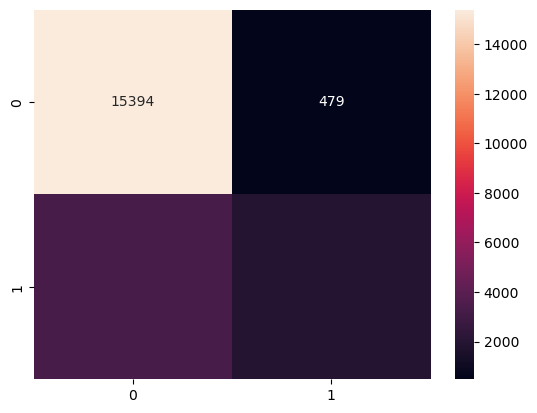

In [46]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [47]:
print(classification_report(Y_train,y_hat))

              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89     15873
        >50K       0.80      0.36      0.50      5239

    accuracy                           0.82     21112
   macro avg       0.81      0.67      0.70     21112
weighted avg       0.82      0.82      0.79     21112



In [48]:
# Confusion_Matrix and classification report for Testing Data
cm1=confusion_matrix(Y_test,y_pred)
cm1

array([[6545,  235],
       [1447,  822]], dtype=int64)

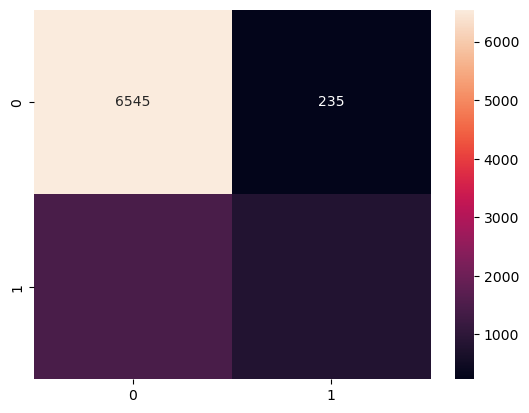

In [49]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.show()

In [50]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89      6780
        >50K       0.78      0.36      0.49      2269

    accuracy                           0.81      9049
   macro avg       0.80      0.66      0.69      9049
weighted avg       0.81      0.81      0.79      9049

